In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('us_counties_covid19_daily.csv')

In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [5]:
df.shape

(800437, 6)

In [6]:
df.describe()

,fips,cases,deaths
count,792846.000000,800437.000000,783704.000000
mean,31238.198828,1589.667358,48.815309
std,16289.192418,8385.201329,440.482993
min,1001.000000,0.000000,0.000000
25%,18179.000000,29.000000,0.000000
50%,29209.000000,175.000000,3.000000
75%,46097.000000,775.000000,17.000000
max,78030.000000,439538.000000,24346.000000


In [7]:
df.isnull().sum() / len(df) * 100

date      0.000000
county    0.000000
state     0.000000
fips      0.948357
cases     0.000000
deaths    2.090483
dtype: float64

In [8]:
# # start log transform
# df['deaths'] = np.log(df['deaths'])    ## agr data ma age ki values zada zero ky qareeb hn tu log1p use hota ha.
df['fips'] = np.log(df['fips'])
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,10.879197,1,0.0
1,2020-01-22,Snohomish,Washington,10.879197,1,0.0
2,2020-01-23,Snohomish,Washington,10.879197,1,0.0
3,2020-01-24,Cook,Illinois,9.742790,1,0.0
4,2020-01-24,Snohomish,Washington,10.879197,1,0.0


<Axes: ylabel='fips'>

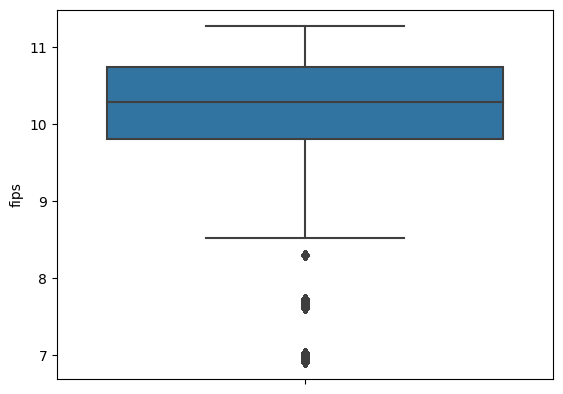

In [9]:
sns.boxplot(data = df, y='fips')

In [26]:
df['fips'] = np.log(df['cases'])
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,0.0,1,0.0
1,2020-01-22,Snohomish,Washington,0.0,1,0.0
2,2020-01-23,Snohomish,Washington,0.0,1,0.0
3,2020-01-24,Cook,Illinois,0.0,1,0.0
4,2020-01-24,Snohomish,Washington,0.0,1,0.0


<Axes: xlabel='cases'>

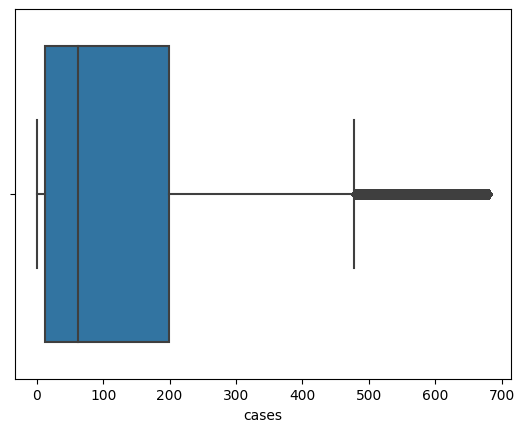

In [30]:
sns.boxplot(data = df, x='cases')

In [28]:
Q1 = df['cases'].quantile(0.25)
Q3 = df['cases'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['cases'] > lower_bound) & (df['cases'] < upper_bound)]

In [10]:
Q1 = df['fips'].quantile(0.25)
Q3 = df['fips'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['fips'] > lower_bound) & (df['fips'] < upper_bound)]

In [11]:
df.duplicated().sum()

0

In [20]:
Q1 = df['deaths'].quantile(0.25)
Q3 = df['deaths'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['deaths'] > lower_bound) & (df['deaths'] < upper_bound)]

In [31]:
# 1. import libraraoies
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#2  data
df
#3  select columns to normalize
cols_to_normalize =['deaths', 'fips','cases']

# 4. create the scalar function
scaler = MinMaxScaler()

# 5, fit and transform the data on the saler

df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

In [21]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,0.859633,1,0.0
1,2020-01-22,Snohomish,Washington,0.859633,1,0.0
2,2020-01-23,Snohomish,Washington,0.859633,1,0.0
3,2020-01-24,Cook,Illinois,0.446012,1,0.0
4,2020-01-24,Snohomish,Washington,0.859633,1,0.0


<Axes: xlabel='deaths', ylabel='Count'>

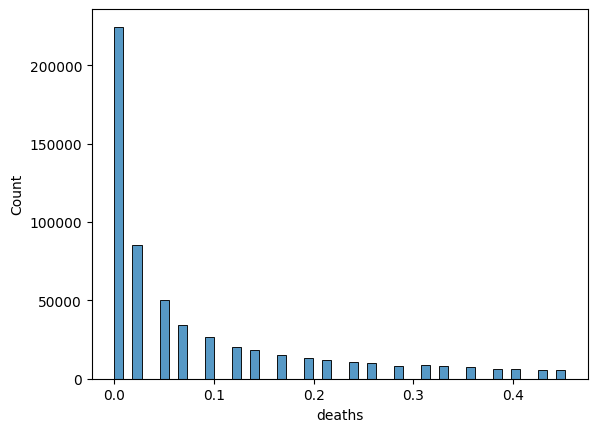

In [22]:
sns.histplot(x='deaths', data=df, bins= 50 )

<Axes: xlabel='cases', ylabel='Count'>

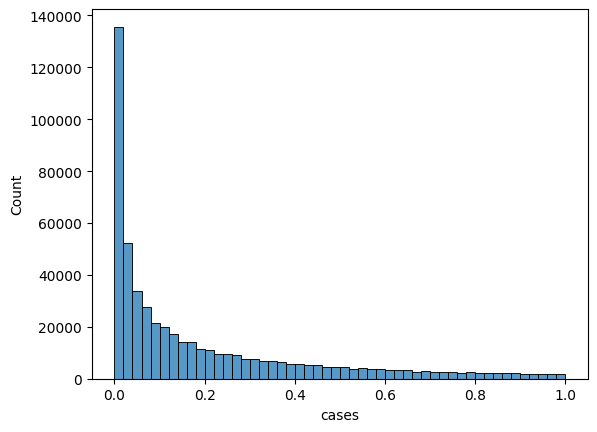

In [32]:
sns.histplot(x='cases', data=df, bins= 50 )

In [33]:
df.describe()

,fips,cases,deaths
count,522291.000000,522291.000000,522291.000000
mean,0.588615,0.195903,0.141317
std,0.270993,0.239950,0.214414
min,0.000000,0.000000,0.000000
25%,0.393271,0.017673,0.000000
50%,0.632793,0.089838,0.052632
75%,0.811596,0.291605,0.210526
max,1.000000,1.000000,1.000000


In [34]:
df.to_csv('preprocessed_covid_data.csv')